In [72]:
#завдання 1 - вивід даних з excel;
import numpy as np
import pandas as pd

energy = pd.read_excel('./En_In.xls', usecols=range(2,6), skiprows=range(17), skipfooter=38)
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
display(energy)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


In [73]:
#завдання 2 - конвертація даних і додавання NaN;
energy = energy.replace('...', np.NaN)
energy['Energy Supply'] = energy['Energy Supply'] * 1000000
display(energy)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28.0,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
224,Yemen,3.440000e+08,13.0,0.000000
225,Zambia,4.000000e+08,26.0,99.714670


In [74]:
#завдання 3 - перейменування країн;
old_name = np.array(energy[(energy['Country'] == ('Republic of Korea'))
      | (energy['Country'].str.contains('United States of America'))
      | (energy['Country'].str.contains('United Kingdom of Great Britain and Northern Ireland'))
      | (energy['Country'].str.contains('China, Hong Kong Special Administrative Region'))]['Country'])
new_name = np.array(['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])

energy['Country'] = energy['Country'].replace(old_name, np.sort(new_name))

energy[(energy['Country'] == ('Republic of Korea'))
      | (energy['Country'].str.contains('United States of America'))
      | (energy['Country'].str.contains('United Kingdom'))
      | (energy['Country'].str.contains('Hong Kong'))]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong,5.850000e+08,82.0,0.00000
214,United Kingdom,7.920000e+09,124.0,10.60047


In [75]:
#завдання 4 - чистка назв країн;
display(energy[energy['Country'].str.contains(r'(\d+)|(\s\([\w\s]+\))', regex=True)]['Country'])
energy['Country'] = energy['Country'].replace(fr'(\d+)|(\s\([\w\s]+\))', '', regex=True)
display(energy[energy['Country'] == 'Switzerland'])

C:\Users\mi7on\AppData\Local\Temp\ipykernel_17368\3596651599.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(energy[energy['Country'].str.contains(r'(\d+)|(\s\([\w\s]+\))', regex=True)]['Country'])


11                                      Australia1
24                Bolivia (Plurinational State of)
42                                          China2
44     China, Macao Special Administrative Region4
58                                        Denmark5
70                     Falkland Islands (Malvinas)
73                                         France6
83                                      Greenland7
97                                      Indonesia8
98                      Iran (Islamic Republic of)
103                                         Italy9
105                                        Japan10
111                                       Kuwait11
133               Micronesia (Federated States of)
143                                  Netherlands12
161                                     Portugal13
177                                 Saudi Arabia14
179                                       Serbia15
183                      Sint Maarten (Dutch part)
190                            

,Country,Energy Supply,Energy Supply per Capita,% Renewable
197,Switzerland,1.113000e+09,136.0,57.74548


In [76]:
energy.loc[energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641026
24,Bolivia,3.360000e+08,32.0,31.477120
164,South Korea,1.100700e+10,221.0,2.279353


In [77]:
#завдання 5;
gpd = pd.read_csv('./gpd.csv', skiprows=range(4), header=None)
gpd.columns = gpd.iloc[0]
gpd = gpd.drop(0)
gpd['Country Name'] = gpd['Country Name'].replace({'Korea, Rep.':'South Korea',
                                                  'Iran, Islamic Rep.':'Iran',
                                                  'Hong Kong SAR, China':'Hong Kong'})
display(gpd.iloc[:, np.r_[0:3, np.r_[50:60]]])

,Country Name,Country Code,Indicator Name,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
1,Aruba,ABW,GDP at market prices (constant 2010 US$),NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
2,Andorra,AND,GDP at market prices (constant 2010 US$),4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
3,Afghanistan,AFG,GDP at market prices (constant 2010 US$),1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
4,Angola,AGO,GDP at market prices (constant 2010 US$),5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
5,Albania,ALB,GDP at market prices (constant 2010 US$),9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
261,South Africa,ZAF,GDP at market prices (constant 2010 US$),3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
262,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
263,Zambia,ZMB,GDP at market prices (constant 2010 US$),1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10


In [78]:
#завдання 6;
mag_country = pd.read_excel('./scimagojr.xlsx')
display(mag_country)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


In [79]:
#завдання 7;
coutry_rank = mag_country.iloc[0:15]
last_gpd = gpd.iloc[:, np.r_[0, np.r_[50:60]]].rename(columns={'Country Name':'Country'})

result = pd.merge(pd.merge(coutry_rank, energy, on='Country'), last_gpd, on='Country').set_index('Country')
display(result.shape)
display(result)

(15, 20)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [80]:
# завдання 8;
def avg_gpd():
    df = result.iloc[:, 10:20]
    return pd.Series(df.mean(axis=1).sort_values(ascending=False))

avg_gpd()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [81]:
# завдання 9;
def gpd_change():
    country = avg_gpd().index.to_list()[4]
    dif = result.loc[country][2015.0] - result.loc[country][2006.0]
    res1 = (country, dif)
    return res1

gpd_change()

('France', 153345695364.24023)

In [82]:
# завдання 10;
def max_prenewable():
    max_percent = result[result['% Renewable'] == result['% Renewable'].max()]['% Renewable']
    res1 = (max_percent.index[0], max_percent.iloc[0])
    return res1

max_prenewable()

('Brazil', 69.64803)

In [83]:
# завдання 11;
def estimate_pop():
    population = result['Energy Supply'] / result['Energy Supply per Capita']
    result1 = result
    result1.insert(10, 'Population', population, True)
    res1 = result1['Population'].sort_values(ascending=False)
    return (res1.index[5], res1.iloc[5])

estimate_pop()    

('Japan', 127409395.97315437)

In [84]:
# завдання 12;
def correlation():
    result2 = result
    doc_per_capita = result2['Citable documents'] / result2['Population']
    result2.insert(6, 'Citable Documents per Capita', doc_per_capita, True)
    res1 = result2[['Citable Documents per Capita', 'Energy Supply per Capita']]
    return result2['Citable Documents per Capita'].corr(result2['Energy Supply per Capita'])

correlation()

0.7940010435442946

In [85]:
# завдання 13;
display(result['% Renewable'])

Country
China                 19.754910
United States         11.570980
Japan                 10.232820
United Kingdom        10.600470
Russian Federation    17.288680
Canada                61.945430
Germany               17.901530
India                 14.969080
France                17.020280
South Korea            2.279353
Italy                 33.667230
Spain                 37.968590
Iran                   5.707721
Australia             11.810810
Brazil                69.648030
Name: % Renewable, dtype: float64

In [86]:
def full_df():
    continent = ['Asia', 'North America', 'Asia', 'Europe', 'Europe', 'North America', 
             'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'Europe', 'Asia', 'Austrailia',
            'South America']
    country = ['China', 'United States', 'Japan', 'United Kingdom', 'Russian Federation', 'Canada',
          'Germany', 'India', 'France', 'South Korea', 'Italy', 'Spain', 'Iran', 'Australia',
          'Brazil']

    country_dict = pd.DataFrame({
        'Country':country,
        'Continent':continent
    }).set_index('Country')
    result2 = result.join(country_dict)
    return result2

In [87]:
# завдання 14;
def continent_info():
    result2 = full_df()
    
    res1 = result2[['Continent', 'Population']].groupby('Continent').agg({'Continent':'size',
                                                                           'Population':['sum', 'mean', 'std']})
    res1.columns = res1.columns.droplevel(0)
    return res1

continent_info()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Austrailia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


<Axes: title={'center': 'Bubble chart'}, xlabel='Rank', ylabel='% Renewable'>

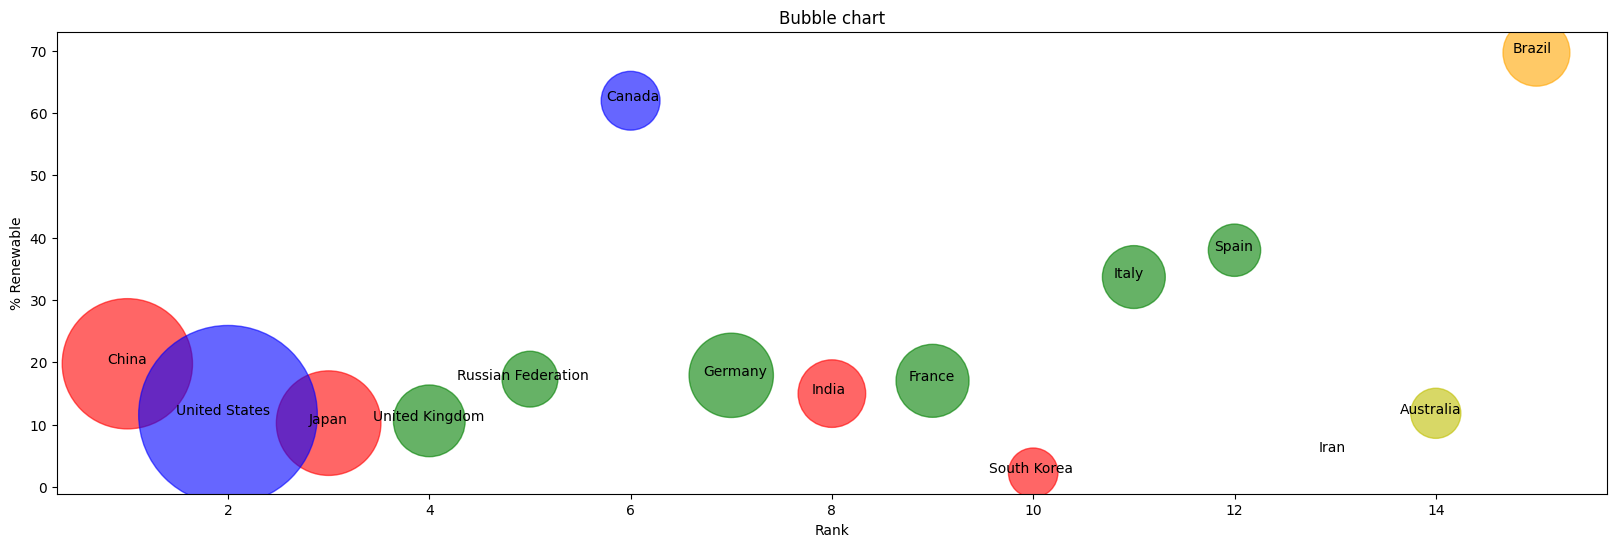

In [88]:
# завдання 15;
import matplotlib.pyplot as plt
import math

def buble_diagram():
    result2 = full_df();
    df = result2[['Rank', '% Renewable', 2015.0, 'Continent']]
    
    country_color = pd.DataFrame({
        'Continent':['Asia', 'Austrailia', 'Europe', 'North America', 'South America'],
        'Colors':['r', 'y', 'g', 'b', 'orange']
    }).set_index('Continent')

    df_graph = pd.merge(df, country_color, left_on='Continent', right_index=True, sort=False)

    chart = df_graph[['Rank', '% Renewable']].plot(kind='scatter', x='Rank', y='% Renewable', figsize=(20,6),
        s=df_graph[2015.0] / math.pow(10, 9),
        title='Bubble chart', xlabel='Rank', ylabel='% Renewable', alpha=0.6, c=df_graph['Colors'])

    ind_list = df_graph.index.to_list()
    for i in range(df_graph.index.shape[0]):
        country = ind_list[i]
        chart.text(df_graph['Rank'].iloc[i] - (len(country) * 0.04),
                   df_graph['% Renewable'].iloc[i],
                   country)
    display(chart)

buble_diagram()